In [2]:
# import libraries
import pandas as pd
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# set (local) path
path = '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/'

In [4]:
# load RB metadata
df_RB = pd.read_csv(path + 'inputs/RBB_AMPAIM_MSQ141.csv', header=None)

# remove extraenous info column and notes etc.
df_RB = df_RB.iloc[:26,:10]

# grab names of metadata vars
header_RB = df_RB.iloc[0,:]

# remove descriptive row
df_RB = df_RB.iloc[2:,:]

# header RB is Participant ID, Sex, Race, Hispanic? (Y/N), Age at visit, Disease duration, Disease active?, Diagnosis, ever treated, medications
df_RB.head()

,0,1,2,3,4,5,6,7,8,9
2,703.006.stamp,F,White,N,60,1,NaN,Non-Sjogren's sicca*,N,NaN
3,702.006.stamp,F,White,N,38,1,NaN,Non-Sjogren's sicca*,N,NaN
4,703.005.stamp,F,White,N,44,16,NaN,Non-Sjogren's sicca*,N,NaN
5,403.001.lockit,F,Asian,N,32,1,Y,SLE,Y,HCQ
6,501.002.aimra,F,White,N,82,0.5,Y,RA,Y,MTX


In [5]:
# subject file 'Subjects.1' has the names which is column 16
df_subject = pd.read_csv(path + 'inputs/Guma_AMPAIM_subject.tsv', sep='\t', header=None)

# pull the header for later merge
header = df_subject.iloc[:5,:]

# remove header
df_subject = df_subject.iloc[5:,:]

# df_RB is 24 values, df_specimen is 188, their overlap is 22
# this is in df_RB missing from df_specimen {'601.003.ellipss', '601.001.ellipss'}
# print(set(df_RB.index.values).difference(set(df_subject[16].values)))
df_subject = df_subject.loc[df_subject[16].isin(list(df_RB[0].values))]

# join on 16 in df_specimen, Participant ID in df_rb
df_subject = pd.merge(df_subject, df_RB, how='left', left_on=16, right_on=0)

# add new metadata columns
# additional metadata looks like this 
admd = ['AdditionalMetaData', '__name__', 'Optional', 'Text', 'Limit 256 Characters']

RB_md = ['ParticipantIDRB','GenderRB', 'RaceRB', 'Hispanic', 'AgeAtVisit', 'DiseaseDuration', 'DiseaseActive', 'Diagnosis', 'EverTreated','Medication']

for x in RB_md:
    admd[1] = x
    header[len(header.columns)] = admd

# rename df_specimen columns to header columns in prep for vertical join
df_subject.columns = header.columns

# add header to top of df_specimen
df_subject = pd.concat([header, df_subject])

# convert None in column 31 Medication to NONE
df_subject[31] = df_subject[31].fillna('NoMed')

# export to csv
df_subject.to_csv(path + 'inputs/df_subject_MSQ141_KB.tsv', sep='\t', index=False, header=False, na_rep='NA')
df_subject.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Ethnicity,Genotypes,Heights,Heights,ICDCode,Illness,Illness,Illness,Illness,Intervention,...,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData,AdditionalMetaData
1,Ethnicity,Genotype,Height,HeightDateCollected,ICDCode,IllnessNotes,IllnessEndDate,IllnessInstanceID,IllnessStartDate,InterventionNotes,...,ParticipantIDRB,GenderRB,RaceRB,Hispanic,AgeAtVisit,DiseaseDuration,DiseaseActive,Diagnosis,EverTreated,Medication
2,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,...,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional
3,Text,Text,Number,Date,Text,Text,Date,Date,Date,Text,...,Text,Text,Text,Text,Text,Text,Text,Text,Text,Text
4,Limit 45 Characters,Limit 180 Characters,Meters,Year-Month-Day,Limit 8 Characters,Limit 256 Characters,Year-Month-Day,Limit 256 Characters,Year-Month-Day,Limit 256 characters,...,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters,Limit 256 Characters


In [6]:
# specimen file 'Subjects.1' has the names which is column 16
df_specimen = pd.read_csv(path + 'inputs/Guma_AMPAIM_specimen.tsv', sep='\t', header=None)

# pull the header for later merge
header = df_specimen.iloc[:5,:]

# remove header
df_specimen = df_specimen.iloc[5:,:]

# df_RB is 24 values, df_specimen is 188, their overlap is 22
# this is in df_RB missing from df_specimen {'601.003.ellipss', '601.001.ellipss'}
# print(set(df_RB.index.values).difference(set(df_specimen[16].values)))
# filter out specimens that are present in df_RB
df_specimen = df_specimen.loc[df_specimen[0].isin(list(df_RB[0].values))]

# add header to top of df_specimen
df_specimen = pd.concat([header, df_specimen])

# export to csv
df_specimen.to_csv(path + 'inputs/df_specimen_MSQ141_KB.tsv', sep='\t', index=False, header=False, na_rep='NA')
df_specimen.head()


,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,AdditionalMetaData,Aliquot,Aliquot,Aliquot,BodySite,BodySite,CollectionSite,CollectionSite,CollectionSite,CollectionSite,...,Specimen,Specimen,Specimen,StorageLocation,StorageLocation,Study,Study,Study,Type,Type
1,SubjectIdCol,AliquotID,AliquotWeight,AliquotWeightUnit,SpecimenBodySite,UberonCodeBodySite,Biome,CollectionSiteName,CollectionSiteTechnician,Depth,...,SpecimenNotes,SpecimenWeight,SpecimenWeightUnit,StorageInstitution,StorageFreezer,RelevantLinks,StudyName,StudyType,SpecimenType,UberonCodeType
2,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,Optional,...,Optional,Optional,Optional,Optional,Optional,Optional,Required,Optional,Optional,Optional
3,Text,Text,Number,Text,Text,Text,Text,Text,Text,Number,...,Text,Number,Text,Text,Text,Web Address,Text,Text,Text,Text
4,Limit 256 Characters,Limit 256 Characters,Metric Unit,Metric Unit,Limit 45 Characters,Limit 45 Characters,Limit 45 Characters,Limit 45 Characters,Limit 45 Characters,Meters,...,Limit 180 Characters,Metric Unit,Metric Unit,Limit 256 Characters,Limit 256 Characters,Limit 180 Characters,Limit 45 Characters,Limit 45 Characters,Limit 45 Characters,Limit 45 Characters


KruskalResult(statistic=6.40066666666668, pvalue=0.2691602948312763)


/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_56512/3167545304.py:31: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy', palette='dark:grey', hue=None)
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


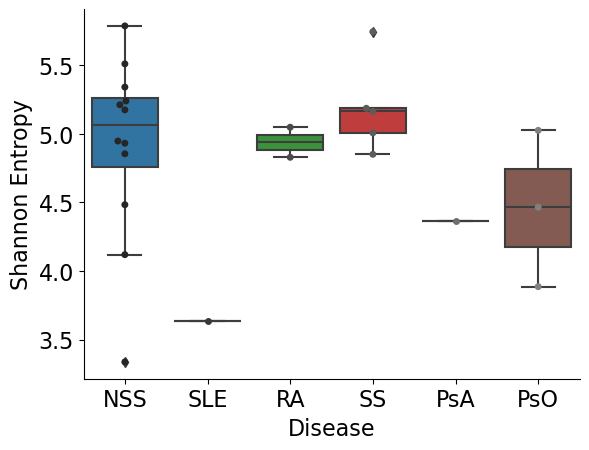

In [7]:
# plot nicer alpha div
df_alpha = pd.read_csv(path + 'inputs/Qiime2_0_MSQ141/adiv_shannon.tsv', sep='\t')
df_alpha = df_alpha.iloc[1:,:]
df_alpha = df_alpha.set_index('id')

# drop CD
df_alpha = df_alpha[df_alpha['IllnessNotes'] != 'cd']

# convert NSS to SICCA
# df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('Non-Sjogrens sicca', 'SICCA')

# convert PsA_PsO to PSA
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('PsA_PsO', 'PsA')


df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('Non-Sjogrens sicca','NSS')
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('pso','PsO')
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('psa','PsA')
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('sle','SLE')
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('SjD','SS')
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('healthy','Healthy')

# convert to float
df_alpha['shannon_entropy'] = df_alpha['shannon_entropy'].map(lambda x: float(x)) 

# KW test
print(scipy.stats.kruskal(*list(df_alpha.groupby('IllnessNotes')['shannon_entropy'].apply(list).values), nan_policy='propagate', axis=0, keepdims=False))

# do sns 
ax = sns.boxplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy')
sns.swarmplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy', palette='dark:grey', hue=None)

# ax.axes.set_title("Title",fontsize=48)
ax.set_ylabel("Shannon Entropy",fontsize=16)
ax.set_xlabel("Disease",fontsize=16)
ax.tick_params(labelsize=16)
#plt.xticks(rotation=45)
sns.despine()
plt.savefig(path + 'inputs/Qiime2_0_MSQ141/adiv.pdf')

In [8]:
# Sicca vs SS analysis 
df_141 = pd.read_csv(path + 'inputs/qiime_mapping_file_MSQ141_fixdiag.tsv', sep='\t')
df_ss = df_141[df_141['Diagnosis'].isin(['categorical','non-sjogrens sicca','ss'])]
df_ss.to_csv(path + 'inputs/qiime_mapping_file_MSQ141_ss.tsv', sep='\t', index=False, na_rep='nan') 
df_ss


,#SampleID,BarcodeSequence,LinkerPrimerSequence,AmpliconWell,BSA,BSASeverityByBSA,CCPtiter,CRP,CurrentBiologics,CurrentIntralesionalSteroids,...,SpecimenType,UberonCodeType,Weight,WeightDateCollected,index,EverTreated,Medication,DiseaseActive,AgeAtVisit,Batch
0,#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
1,703.006.stamp.plate313,CACCATCTCCGG,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,1.0,N,NoMed,NaN,60,MSQ141
2,702.006.stamp.plate313,TATGTTGACGGC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,2.0,N,NoMed,NaN,38,MSQ141
3,703.005.stamp.plate313,TCGAGCCGATCT,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,3.0,N,NoMed,NaN,44,MSQ141
6,702.005.stamp.plate313,GCGCGGCGTTGC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,6.0,N,NoMed,NaN,52,MSQ141
7,703.009.stamp.plate313,AGACTTCTCAGG,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,7.0,Y,HCQ_prednisone,Y,56,MSQ141
8,703.008.stamp.plate313,AGTTCTCATTAA,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,8.0,Y,NoMed,NaN,53,MSQ141
9,703.001.stamp.plate313,GTGTCGAGGGCA,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,9.0,N,NoMed,Y,18,MSQ141
10,701.009.stamp.plate313,AGTGTTTCGGAC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,10.0,Y,HCQ,NaN,45,MSQ141
11,703.011.stamp.plate313,GTTGCTGAGTCC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fecal,NaN,NaN,NaN,11.0,N,NoMed,N,76,MSQ141


In [9]:
# standard binarize column for each medication
# grab all medications
meds = list(df_141['Medication'].values)

# drop 'categorical'
meds.remove('categorical')

uniq_meds = []
# split items with '_'
for m in meds:
    if '_' in m:
        items = m.split('_')
        items = [i.lower() for i in items]
        uniq_meds = uniq_meds + items
    else:
        uniq_meds.append(m.lower())
    
uniq_meds = list(set(list(uniq_meds)))
print(uniq_meds)

# create new column for each med
for u in uniq_meds:
    df_141[u] = 0
    df_141.loc[0,u] = 'categorical'

# iterate through each sample
for index, row in df_141.iterrows():
    if index != 0: # the whole '#q2:types', 'categorical' thing
        medications = df_141.loc[index,'Medication'].lower()
        medications = medications.split('_')
        for m in medications:    
            df_141.loc[index,m] = 1

# new mapping file with med columns
df_141.to_csv(path + 'inputs/qiime_mapping_file_MSQ141_meds.tsv', sep='\t', index=False, na_rep='nan')
df_ss = df_141[df_141['Diagnosis'].isin(['categorical','non-sjogrens sicca','ss'])]
df_ss.to_csv(path + 'inputs/qiime_mapping_file_MSQ141_meds_ss.tsv', sep='\t', index=False, na_rep='nan') 
           
df_141.head()

['nomed', 'topicals', 'leflunomide', 'mtx', 'hcq', 'prednisone']


/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_56512/284935320.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'categorical' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_141.loc[0,u] = 'categorical'
/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_56512/284935320.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'categorical' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_141.loc[0,u] = 'categorical'
/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_56512/284935320.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'categorical' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_141.loc[0,u] = 'categorical

,#SampleID,BarcodeSequence,LinkerPrimerSequence,AmpliconWell,BSA,BSASeverityByBSA,CCPtiter,CRP,CurrentBiologics,CurrentIntralesionalSteroids,...,Medication,DiseaseActive,AgeAtVisit,Batch,nomed,topicals,leflunomide,mtx,hcq,prednisone
0,#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
1,703.006.stamp.plate313,CACCATCTCCGG,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NoMed,NaN,60,MSQ141,1,0,0,0,0,0
2,702.006.stamp.plate313,TATGTTGACGGC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NoMed,NaN,38,MSQ141,1,0,0,0,0,0
3,703.005.stamp.plate313,TCGAGCCGATCT,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NoMed,NaN,44,MSQ141,1,0,0,0,0,0
4,403.001.lockit.plate313,TAAGGTCGATAA,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HCQ,Y,32,MSQ141,0,0,0,0,1,0


KruskalResult(statistic=0.25253610216014977, pvalue=0.6152949641174131)


/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_56512/563487102.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df_alpha, x='hcq', y='shannon_entropy', palette='dark:grey', hue=None)
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1')])

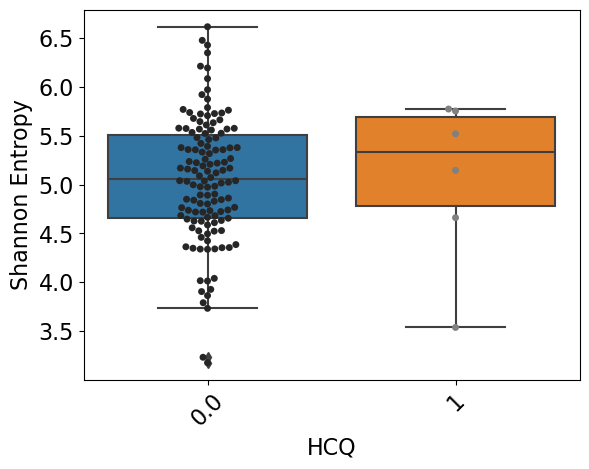

In [10]:
# plot nicer alpha div
df_alpha = pd.read_csv(path + 'inputs/Q2_MSQ141/metadata.tsv', sep='\t')
df_alpha = df_alpha.iloc[1:,:]
df_alpha = df_alpha.set_index('id')

# drop CD
df_alpha = df_alpha[df_alpha['IllnessNotes'] != 'cd']

# convert to float
df_alpha['shannon_entropy'] = df_alpha['shannon_entropy'].map(lambda x: float(x)) 

# KW test
print(scipy.stats.kruskal(*list(df_alpha.groupby('hcq')['shannon_entropy'].apply(list).values), nan_policy='propagate', axis=0, keepdims=False))

# do sns 
ax = sns.boxplot(data=df_alpha, x='hcq', y='shannon_entropy')
sns.swarmplot(data=df_alpha, x='hcq', y='shannon_entropy', palette='dark:grey', hue=None)

# ax.axes.set_title("Title",fontsize=48)
ax.set_ylabel("Shannon Entropy",fontsize=16)
ax.set_xlabel("HCQ",fontsize=16)
ax.tick_params(labelsize=16)
plt.xticks(rotation=45)

# plt.savefig(path + 'inputs/Qiime2_0_MSQ141/adiv.pdf')

KruskalResult(statistic=0.8999999999999986, pvalue=0.34278171114790906)
F_onewayResult(statistic=1.334809924087523, pvalue=0.26602411319209773)


/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_56512/1285183206.py:27: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy', palette='dark:grey', hue=None)
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


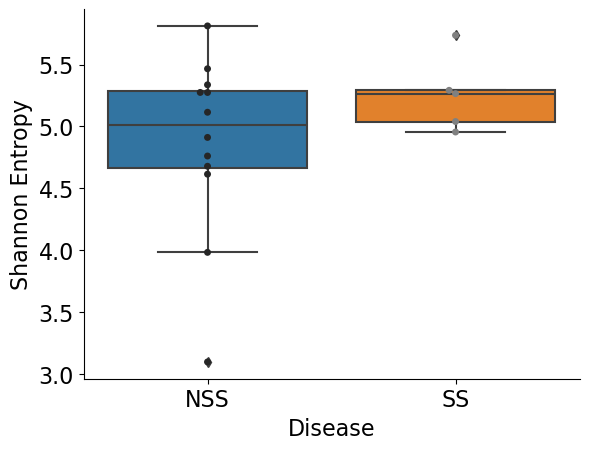

In [14]:
# plot nicer alpha div
df_alpha = pd.read_csv(path + 'inputs/Q2_MSQ141_ss/metadata.tsv', sep='\t')
df_alpha = df_alpha.iloc[1:,:]
df_alpha = df_alpha.set_index('id')

# drop CD
df_alpha = df_alpha[df_alpha['IllnessNotes'] != 'cd']

# convert to float
df_alpha['shannon_entropy'] = df_alpha['shannon_entropy'].map(lambda x: float(x)) 

df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('Non-Sjogrens sicca','NSS')
df_alpha['Diagnosis'] = df_alpha['Diagnosis'].replace('pso','PsO')
df_alpha['Diagnosis'] = df_alpha['Diagnosis'].replace('psa','PsA')
df_alpha['Diagnosis'] = df_alpha['Diagnosis'].replace('sle','SLE')
df_alpha['IllnessNotes'] = df_alpha['IllnessNotes'].replace('SjD','SS')
df_alpha['Diagnosis'] = df_alpha['Diagnosis'].replace('healthy','Healthy')

# KW test
print(scipy.stats.kruskal(*list(df_alpha.groupby('IllnessNotes')['shannon_entropy'].apply(list).values), nan_policy='propagate', axis=0, keepdims=False))

# Perform F-test
print(scipy.stats.f_oneway(*list(df_alpha.groupby('IllnessNotes')['shannon_entropy'].apply(list).values)))
      
# do sns 
ax = sns.boxplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy')
sns.swarmplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy', palette='dark:grey', hue=None)

# ax.axes.set_title("Title",fontsize=48)
ax.set_ylabel("Shannon Entropy",fontsize=16)
ax.set_xlabel("Disease",fontsize=16)
ax.tick_params(labelsize=16)
#plt.xticks(rotation=45)
sns.despine()
# plt.savefig(path + 'inputs/Qiime2_0_MSQ141/adiv.pdf')

KruskalResult(statistic=7.922666666666672, pvalue=0.1605494337835878)


/var/folders/48/kjsfkfqd4z1f5svhyyb5kvdw0000gn/T/ipykernel_1347/3141957614.py:17: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy', palette='dark:grey', hue=None)
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/KevinBu/anaconda3/envs/jupyterlab/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Non-Sjogrens sicca'),
  Text(1, 0, 'SLE'),
  Text(2, 0, 'RA'),
  Text(3, 0, 'SjD'),
  Text(4, 0, 'PsA_PsO'),
  Text(5, 0, 'PsO')])

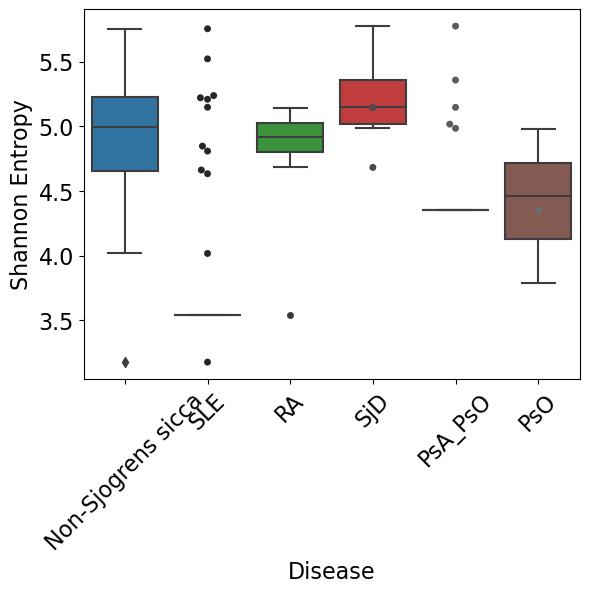

In [15]:
# plot nicer alpha div
df_alpha = pd.read_csv(path + 'inputs/Q2_MSQ141/metadata.tsv', sep='\t')
df_alpha = df_alpha.iloc[1:,:]
df_alpha = df_alpha.set_index('id')

# drop CD
df_alpha = df_alpha[df_alpha['IllnessNotes'] != 'cd']

# convert to float
df_alpha['shannon_entropy'] = df_alpha['shannon_entropy'].map(lambda x: float(x)) 

# KW test
print(scipy.stats.kruskal(*list(df_alpha.groupby('IllnessNotes')['shannon_entropy'].apply(list).values), nan_policy='propagate', axis=0, keepdims=False))

# do sns 
ax = sns.boxplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy')
sns.swarmplot(data=df_alpha, x='IllnessNotes', y='shannon_entropy', palette='dark:grey', hue=None)

# ax.axes.set_title("Title",fontsize=48)
ax.set_ylabel("Shannon Entropy",fontsize=16)
ax.set_xlabel("Disease",fontsize=16)
ax.tick_params(labelsize=16)
plt.xticks(rotation=45)

# plt.savefig(path + 'inputs/Qiime2_0_MSQ141/adiv.pdf')